# Random Numbers & Hacker Statistics — Empire State Random Walk

Imagina lo siguiente: 
Estas subiendo por Torre de Madrid y jugas el siguiente juego con un amigo: 
- Lanzas un dado **100** veces.  
- Si sale **1 o 2** → bajas **1** piso.  
- Si sale **3, 4 o 5** → subes **1** piso.  
- Si sale **6** → vuelves a lanzar y **subes** el número de peldaños del nuevo lanzamiento (1–6).  
- **No** puedes bajar de piso **0**.  
- Eres un poco torpe: en cada movimiento hay una probabilidad de **0.1% = 0.001** de **caer** hasta el piso 0.  
- Apuestas que alcanzarás el piso **60** en algún momento.

**Pregunta:** ¿Cuál es la probabilidad de ganar la apuesta?
 

**Objetivo:** aprender y practicar simulación estocástica https://es.wikipedia.org/wiki/Proceso_estoc%C3%A1stico construyendo paso a paso un **random walk** (camino aleatorio) con reglas concretas, y estimar por **Monte Carlo** la probabilidad de alcanzar cierto piso.

¿Por qué aprender a simular?
 https://es.khanacademy.org/math/probability

Acrónimos usados una sola vez al inicio:
- **GPAN — *Generador pseudoaleatorio de números* — Generador Pseudoaleatorio**: (https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_pseudoaleatorios)
 algoritmo que produce secuencias numéricas que parecen aleatorias, controladas por una **seed** (semilla).
- **IC — *Intervalo confianza* — Intervalo de Confianza**:https://es.wikipedia.org/wiki/Intervalo_de_confianza rango que estima la incertidumbre de un parámetro (aquí, una probabilidad).



---

## Flujo de aprendizaje
1) **Números Aleatorios** y reproducibilidad.  
2) **Ejemplo:**: lanzamiento de moneda y dados 
3) **Historia** de "La Torre de Madrid" (reglas del juego).  
4) **Simulación** de una caminata (100 lanzamientos).  
5) **Monte Carlo**: miles de simulaciones y estimación de probabilidad  

 


## 1) Números Aleatorios

En Python usaremos `numpy.random` como GPAN. La **seed** (semilla) fija la secuencia → **reproducibilidad**.


In [97]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)  # Asegura reproducibilidad

print(f"número aleatorio entre 0 y 1:  {np.random.rand()}")

unamoneda =  np.random.randint(0, 2)
undado = np.random.randint(1, 7)

print(f"moneda: {unamoneda}")
print(f"dado: {undado}")


número aleatorio entre 0 y 1:  0.6964691855978616
moneda: 0
dado: 3


In [98]:
cienmonedas =  np.random.randint(0, 2, 100)
ciendados = np.random.randint(1, 7, 100)

print(f"Cien monedas: {cienmonedas}")
caras = np.sum(cienmonedas == 1)

# Probabilidad empírica de cara
p_cara = caras / len(cienmonedas)
p_cara

Cien monedas: [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1]


np.float64(0.46)

**probabilidad analítica**

$P(A) = \frac{\text{número de casos favorables}}{\text{número de casos posibles}}$



## 2) Crear lanzamiento de moneda y dados

**Tarea:** usando `np.random.seed(...)` y `np.random.randint(0, 2)`, imprime `"heads"` si sale 0 y `"tails"` si sale 1.


In [99]:
# Tirar una Moneda
import numpy as np

moneda = np.random.randint(0,2)
if moneda == 0:
    print("Cruz")
else:
    print("Cara")
    


Cara


In [100]:
# tirar 10 monedas
# random.randint(start, stop)

tiradas = []

for x in range(10):
    moneda = np.random.randint(0,2)
    if moneda == 0:
        tiradas.append("cara")
    else:
        tiradas.append("cruz")

print(tiradas)
        
    

['cruz', 'cara', 'cruz', 'cara', 'cara', 'cruz', 'cruz', 'cruz', 'cara', 'cruz']


In [101]:
# Tirar 10 Monedas 
# random.randint(start, stop, size)


tiradas = []

moneda = np.random.randint(0,2, size=10)

for tirada in moneda:
    if tirada == 0:
        tiradas.append("Cara")
    else:
        tiradas.append("Cruz")
    
print(tiradas)


['Cruz', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cara']


In [102]:
# Tirar un dado y dar paso

paso = 50

# tirar el dado
dado = np.random.randint(1, 7)

# control
if dado <= 2: 
    paso = paso - 1
elif dado <= 5:
    paso = paso + 1
else:
    paso = paso + np.random.randint(1,7)
    
print(dado)
print(paso)


4
51


In [103]:
# Lógica de "Caminar aleatoriamente"


# 10 lanzamientos: 0 = Cara, 1 = Cruz

cruces = [0]                     # lista con el 0 inicial
for x in range(10):              # 10 lanzamientos
    moneda = np.random.randint(0, 2)  # 0 = Cara, 1 = Cruz
    cruces.append(cruces[x] + moneda) # acumulado

print(cruces)  # longitud 11, desde el 0 inicial


[0, 1, 2, 3, 4, 4, 5, 6, 7, 7, 8]


## 3) **Simulación** de una caminata (100 lanzamientos).  


In [104]:
# Lógica de "Caminar aleatoriamente" dados
# NumPy is imported, seed is set

# Initialize random_walk
caminar = [0]

for x in range(3) :
    piso = caminar[-1]
    dado = np.random.randint(1,7)
    print(f"Estamos en el piso {piso} y el dado ha salido {dado}")

    if dado <= 2:
        piso = max(0, piso - 1) # max - Return largest number x = (5, 10)
        print(f"por tanto vamos al piso {piso}")

    elif dado <= 5:
        piso = piso + 1
        print(f"por tanto vamos al piso {piso}")
    else:
        piso = piso + np.random.randint(1,7)
        print(f"por tanto vamos al piso {piso}")

    caminar.append(piso)
    print(f"{caminar}")



Estamos en el piso 0 y el dado ha salido 4
por tanto vamos al piso 1
[0, 1]
Estamos en el piso 1 y el dado ha salido 1
por tanto vamos al piso 0
[0, 1, 0]
Estamos en el piso 0 y el dado ha salido 1
por tanto vamos al piso 0
[0, 1, 0, 0]


[0, 1, 2, 3, 2, 3, 2, 3, 5, 10, 9, 10, 11, 12, 13, 14, 15, 14, 15, 16, 17, 19, 21, 20, 21, 22, 25, 24, 25, 24, 25, 26, 27, 26, 27, 26, 27, 28, 30, 29, 28, 29, 30, 29, 31, 32, 33, 34, 35, 36, 37, 36, 37, 38, 43, 44, 43, 42, 41, 40, 41, 42, 43, 48, 49, 48, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 58, 57, 58, 57, 58, 57, 58, 62, 66, 68, 70, 69, 70, 72, 71, 77, 78, 80, 81, 80, 81, 82, 83, 82, 83]


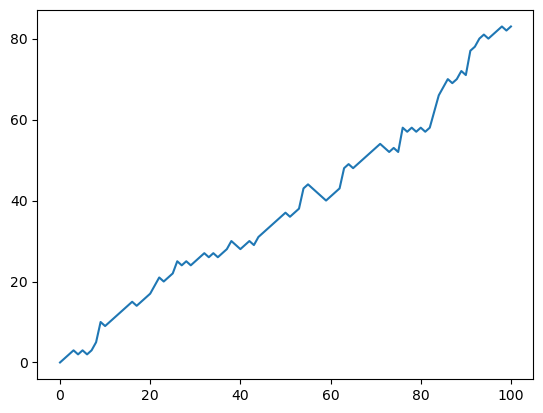

In [105]:
# Lógica de "Caminar aleatoriamente" dados
# NumPy is imported, seed is set

# Initialize random_walk
caminar = [0]

for x in range(100) :
    piso = caminar[-1]
    dado = np.random.randint(1,7)

    if dado <= 2:
        piso = max(0, piso - 1) # max - Return largest number x = (5, 10)

    elif dado <= 5:
        piso = piso + 1
    else:
        piso = piso + np.random.randint(1,7)

    caminar.append(piso)

print(caminar)

import matplotlib.pyplot as plt

plt.plot(caminar)# Plot random_walk
plt.show()


## 5) **Monte Carlo**: miles de simulaciones y estimación de probabilidad + CI.  



### Con Moneda

In [ ]:
# ¿cuál es la probabilidad de optener cruz tirando una moneda 10 veces?

# Probamos una vez: 

import numpy as np
np.random.seed(123)

cruces = [0]

for x in range(10):
    moneda = np.random.randint(0,2) # tiramos una moneda
    cruces.append(cruces[x] + moneda)

print(cruces)


# ¿cuál es la probabilidad de optener cruz tirando una moneda 10 veces?
# probamos 100 veces

cruces_finales = []

for x in range(1000): # voy a probar mil veces
    cruces = [0]
    for x in range(10): # a tirar una mnoneda 10 veces
        moneda = np.random.randint(0,2) # tiramos una moneda
        cruces.append(cruces[x] + moneda)
    cruces_finales.append(cruces[-1])


print(cruces_finales)



[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]
[6, 4, 5, 4, 5, 3, 5, 4, 6, 6, 8, 6, 4, 7, 5, 7, 4, 3, 3, 4, 5, 8, 5, 6, 5, 7, 6, 4, 5, 8, 5, 8, 4, 6, 6, 3, 4, 5, 4, 7, 8, 9, 4, 3, 4, 5, 6, 4, 2, 6, 6, 5, 7, 5, 4, 5, 5, 6, 7, 6, 6, 6, 3, 6, 3, 6, 5, 6, 5, 6, 4, 6, 6, 3, 4, 4, 2, 4, 5, 4, 6, 6, 6, 8, 4, 6, 5, 7, 4, 6, 5, 4, 6, 7, 3, 7, 4, 5, 7, 8, 7, 5, 6, 7, 6, 5, 7, 5, 4, 7, 5, 4, 8, 4, 5, 6, 6, 6, 5, 5, 7, 3, 7, 6, 3, 6, 7, 2, 2, 5, 5, 4, 5, 7, 3, 3, 5, 6, 5, 6, 6, 3, 5, 4, 2, 5, 5, 7, 4, 3, 6, 2, 6, 6, 9, 6, 4, 8, 6, 6, 7, 3, 5, 3, 5, 6, 4, 4, 4, 3, 4, 4, 5, 5, 3, 8, 3, 5, 5, 6, 3, 5, 5, 4, 7, 4, 4, 5, 4, 3, 4, 5, 5, 4, 6, 4, 6, 6, 6, 8, 6, 5, 4, 6, 8, 7, 6, 7, 5, 3, 4, 7, 2, 5, 4, 5, 6, 6, 5, 6, 3, 4, 7, 4, 5, 3, 3, 4, 4, 5, 6, 5, 4, 3, 4, 6, 4, 6, 7, 4, 3, 4, 5, 6, 2, 6, 5, 5, 3, 6, 6, 4, 5, 3, 3, 6, 5, 5, 3, 5, 5, 5, 3, 4, 5, 3, 5, 9, 6, 4, 6, 3, 6, 7, 4, 4, 8, 5, 7, 5, 5, 6, 4, 6, 7, 6, 6, 6, 5, 3, 5, 5, 3, 7, 5, 3, 4, 4, 6, 5, 6, 6, 3, 6, 3, 3, 9, 5, 3, 6, 4, 5, 1, 3, 3, 5, 5, 4, 5, 1, 5, 6,

(array([  10.,    0.,   92.,    0.,  442.,    0., 1178.,    0., 2090.,
           0., 2487.,    0., 2017.,    0., 1157.,    0.,  441.,    0.,
          79.,    7.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

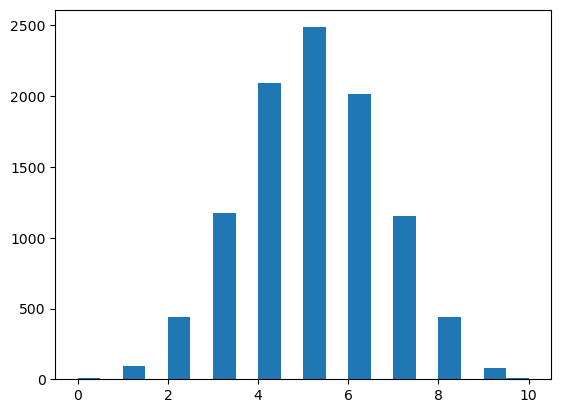

In [107]:
import matplotlib.pyplot as plt
plt.hist(cruces_finales, bins=20)

### Con dados

#### B: haber alcanzado alguna vez ≥ 60 ≥60 en cualquier paso.

[[  0   0   0 ...   0   0   0]
 [  1   3   1 ...   1   1   1]
 [  0   2   4 ...   2   0   2]
 ...
 [ 85  65  89 ...  71 100  92]
 [ 84  66  90 ...  73 101  93]
 [ 85  67  91 ...  74 100  94]]


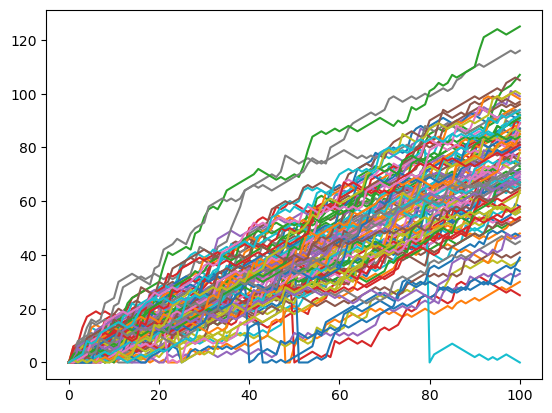

0.79


In [108]:
import numpy as np
import matplotlib.pyplot as plt
# Initialize all_walks (don't change this line)
todos_los_eventos = []

# Simulate random walk five times
for i in range(100) : # veces que repito el experimiento
    # Code from before
    caminar = [0]
    for x in range(100) : # experimento
        piso = caminar[-1]
        dado = np.random.randint(1,7)

        if dado <= 2:
            piso = max(0, piso - 1)
        elif dado <= 5:
            piso = piso + 1
        else:
            piso = piso + np.random.randint(1,7)
        
        if np.random.rand() <= 0.0006:
            piso = 0
        
        caminar.append(piso)


    # Append random_walk to all_walks
    todos_los_eventos.append(caminar)

# Print all_walks
#print(todos_los_eventos)
n_arr = np.array(todos_los_eventos)
n_arr_t= np.transpose(n_arr)
#print(n_arr)
print(n_arr_t)
plt.plot(n_arr_t)
plt.show()

p_ever = (n_arr_t >= 60).any(axis=0).mean()

print(p_ever)


#### Casos favorables entre casos posibles

0.77


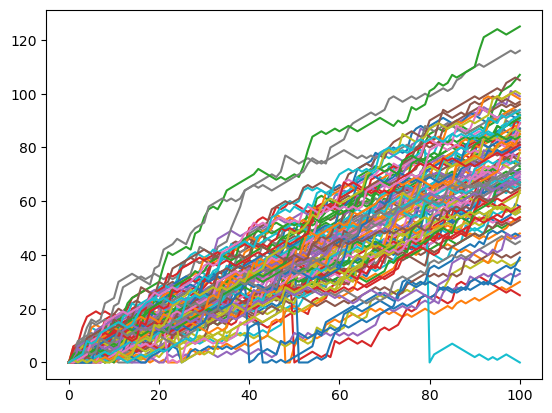

In [109]:
ends = n_arr_t[-1, :]
p_end = (ends >= 60).mean()
print(p_end)

plt.plot(n_arr_t)
plt.show()

In [110]:
np.random.rand() 

0.5574018118150171